- OTT 플랫폼 장르 분포
: 서로 다른 플랫폼에서 TV 프로그램 또는 영화의 장르 비율을 기반으로 어떻게 군집화되는지 보여주는 것

C:\Users\RYUJIWOO\anaconda3\envs\deep\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\RYUJIWOO\anaconda3\envs\deep\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\RYUJIWOO\anaconda3\envs\deep\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


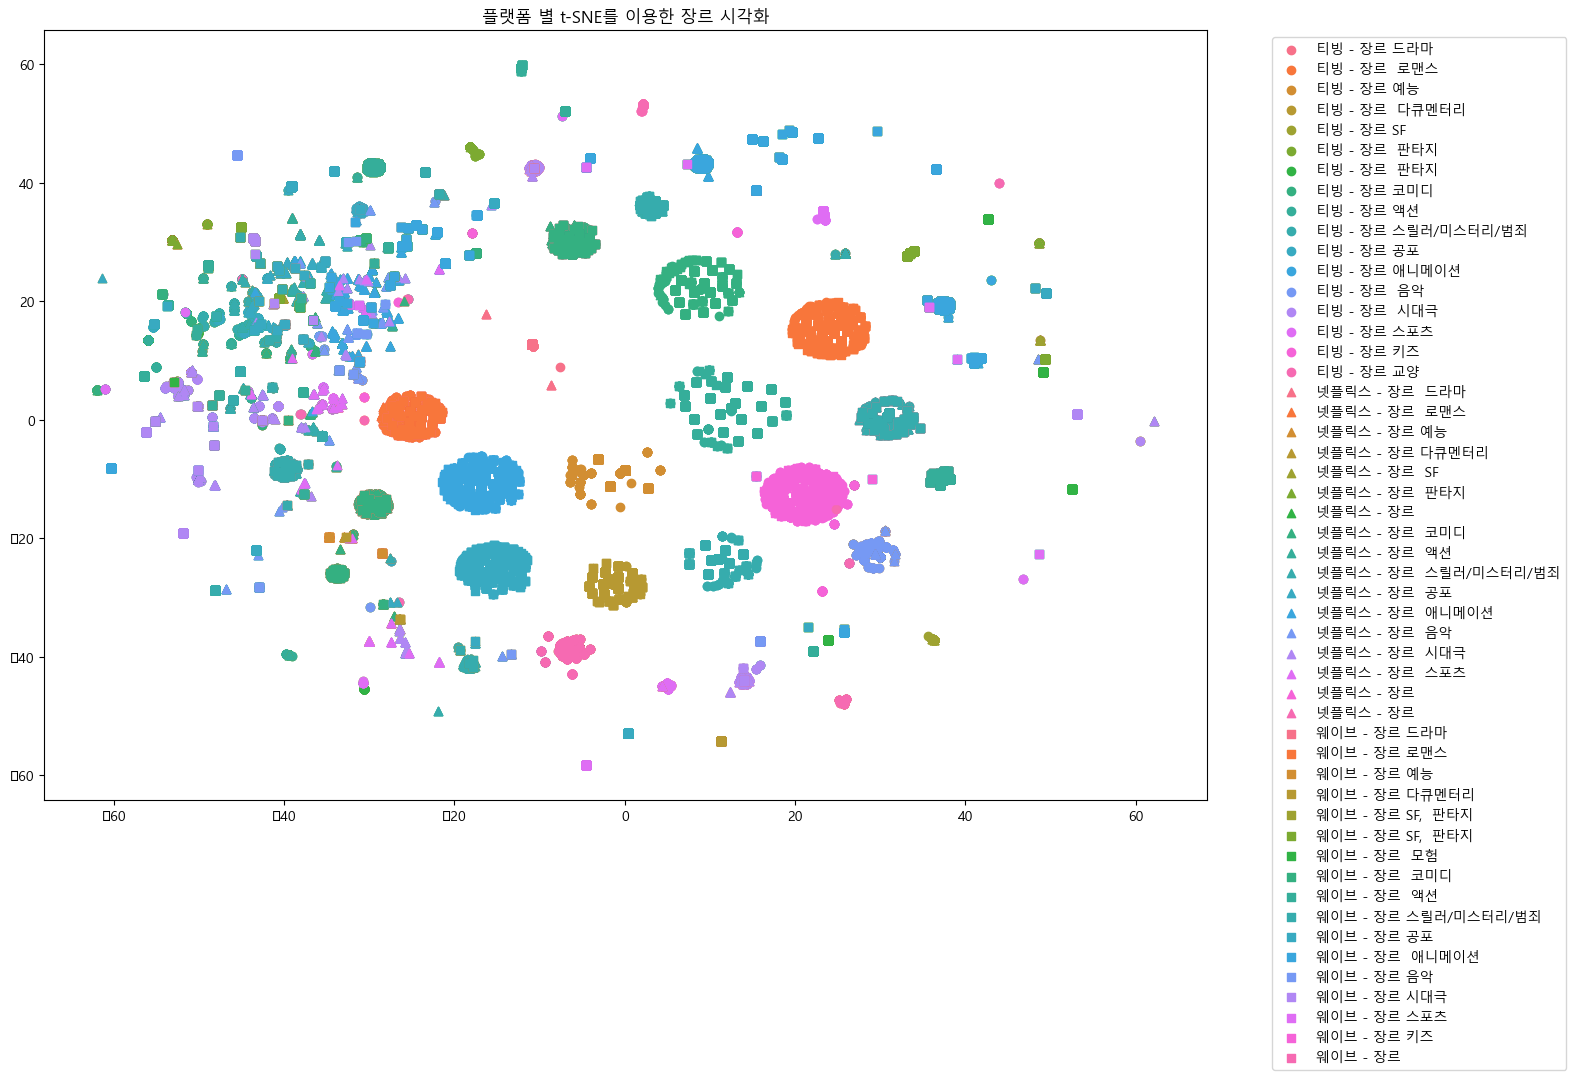

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 데이터 불러오기
tving_data = pd.read_excel("C:\\Users\\RYUJIWOO\\Desktop\\tving\\전체데이터\\티빙.xlsx")
netflix_data = pd.read_excel("C:\\Users\\RYUJIWOO\\Desktop\\tving\\전체데이터\\넷플릭스_수정.xlsx")
wave_data = pd.read_excel("C:\\Users\\RYUJIWOO\\Desktop\\tving\\전체데이터\\웨이브.xlsx")

# 플랫폼 정보 추가
tving_data['플랫폼'] = '티빙'
netflix_data['플랫폼'] = '넷플릭스'
wave_data['플랫폼'] = '웨이브'

# 모든 데이터를 합치기
all_data = pd.concat([tving_data, netflix_data, wave_data], ignore_index=True)

# 각 플랫폼에 대한 마커 정의
platform_markers = {'티빙': 'o', '넷플릭스': '^', '웨이브': 's'}


# 장르를 번호로 매핑
genre_mapping = {'드라마': 1, '로맨스': 2, '예능': 3, '다큐멘터리': 4, 'SF': 5, '판타지': 6, '모험': 7,
                 '코미디': 8, '액션': 9, '스릴러/미스터리/범죄': 10, '공포': 11, '애니메이션': 12,
                 '음악': 13, '시대극': 14, '스포츠': 15, '키즈': 16, '교양': 17}

# 장르 번호를 장르 이름으로 매핑
all_data['장르_번호'] = all_data['장르'].apply(lambda x: [genre_mapping[genre] for genre in x.split(', ')])
all_data['장르_이름'] = all_data['장르_번호'].apply(lambda x: [list(genre_mapping.keys())[list(genre_mapping.values()).index(i)] for i in x])

# 각 작품에 대해 17개의 장르에 대한 비중 계산
all_data['장르_비중'] = all_data['장르_번호'].apply(lambda x: [x.count(i) / len(x) * 100 for i in range(1, 18)])

# 모든 장르를 라벨로 사용
all_data['장르_라벨'] = all_data['장르_이름'].apply(lambda x: ', '.join(x) if len(set(x)) > 1 else x[0])


# 한글 폰트 경로 설정 (본인의 환경에 맞게 설정)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로

# 폰트 설정
font_prop = fm.FontProperties(fname=font_path, size=14)
plt.rcParams['font.family'] = font_prop.get_name()

# 대표 라벨 선택
def choose_representative_label(labels):
    all_labels = ','.join(labels).split(',')
    label_counts = pd.Series(all_labels).value_counts()
    max_count = label_counts.max()
    representative_labels = label_counts[label_counts == max_count].index.tolist()
    return ', '.join(representative_labels)

# TSNE 적용
tsne = TSNE(n_components=2, random_state=42)
coordinates = tsne.fit_transform(all_data['장르_비중'].tolist())

# 장르별 색 정의
genre_colors = sns.color_palette("husl", 17)

# 시각화
plt.figure(figsize=(15, 10))
for platform, marker in platform_markers.items():
    platform_indices = all_data['플랫폼'] == platform
    platform_coordinates = coordinates[platform_indices]
    
    for i in range(17):
        genre_indices = all_data.loc[platform_indices, '장르_번호'].apply(lambda x: i + 1 in x)
        label_genre_names = choose_representative_label(all_data.loc[platform_indices & genre_indices, '장르_라벨'].tolist())
        plt.scatter(platform_coordinates[genre_indices, 0], platform_coordinates[genre_indices, 1], label=f'{platform} - 장르 {label_genre_names}', color=genre_colors[i], marker=marker)

# 범례 표시
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('플랫폼 별 t-SNE를 이용한 장르 시각화')
plt.show()